# Loading Lake Track Visualization

In [17]:
data_file = '../gen5/training-progress.csv'
generation = 'g=5'

import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline

waypoint_file = "lake_track_waypoints.csv"
ml_waypoint_file = "lake_track_ml_generated_waypoints.csv"

with open(waypoint_file) as f:
    x_waypoint = []
    y_waypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_waypoint.append(data[0])
            y_waypoint.append(data[1])
        count += 1
    
with open(ml_waypoint_file) as f:
    x_ml_waypoint = []
    y_ml_waypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_ml_waypoint.append(data[0])
            y_ml_waypoint.append(data[1])   
        count += 1
        
x_start = [ x_ml_waypoint[0] ]
y_start = [ y_ml_waypoint[1] ]

plt.rcParams["figure.figsize"] = [18, 18]
img=mpimg.imread('track1_top_view.png')

# create subsets
data = pd.read_csv(data_file)
training_data = data[data['testing'] == False]
testing_data = data[data['testing'] == True]
testing_sessions = []
testing_sessions_end = []
for i in range(testing_data['session'].max()):
    testing_sessions.append(testing_data[testing_data['session'] == (i+1)])
    end_timestep = testing_sessions[i]['lap_timestep'].max()
    testing_sessions_end.append(testing_sessions[i][testing_sessions[i]['lap_timestep'] == end_timestep])
test_end = pd.concat(testing_sessions_end)
test_end

session testing  lap_timestep  training_sample        acte       mse  \
1522         1    True           314              250   78.416814  0.004899   
2399         2    True           337              250   87.706614  0.002856   
2876         3    True           332              197   85.452729  0.001903   
3676         4    True           655              171  152.224147  0.001185   
4647         5    True           639              250  206.148445  0.001835   
5368         6    True           492              239   97.393054  0.001228   
6675         7    True          1205              170  393.568820  0.001286   
7327         8    True           473              174  137.761577  0.001379   
7998         9    True           471              187  105.904948  0.001302   
8782        10    True           680              145  150.986336  0.001149   
9189        11    True           330              111   89.913158  0.001038   
9712        12    True           471               81   97.482304  0.000969   
10419       13    True           623               82  274.441846  0.001133   
11779       14    True          1225              108  406.127833  0.001031   
13143       15    True          1204              134  329.065217  0.001014   
13607       16    True           329              134   82.941663  0.001427   
14352       17    True           677              101  140.329005  0.000816   
15223       18    True           797               87  338.672027  0.001712   
16670       19    True          1203              165  333.679983  0.000822   
17264       20    True           487              136  102.837525  0.001060   
18035       21    True           672              117  196.070670  0.000955   
18580       22    True           489               86  132.806382  0.001141   
19480       23    True           798               94  260.901484  0.000763   
20823       24    True          1253               92  348.490586  0.001075   
21502       25    True           498              136  124.041479  0.002218   
22589       26    True           800              211  298.348409  0.000868   
23000       27    True           365              128   95.337112  0.000814   
23530       28    True           479               89  145.904552  0.001066   
24433       29    True           801               95  249.488787  0.001300   
25788       30    True          1209              120  384.247056  0.000930   
27201       31    True          1299              117  403.459364  0.000642   
27917       32    True           659               87  215.991908  0.000718   
28512       33    True           525               78  189.660493  0.000925   
29754       34    True          1205               57  358.918159  0.000696   
30327       35    True           498               66  137.962420  0.000836   
31085       36    True           656               84  157.468671  0.000823   
31649       37    True           481               83  130.805834  0.001115   
32068       38    True           333               84   74.491276  0.000681   
33279       39    True          1197               97  384.436755  0.000776   
34519       40    True          1216               60  348.752647  0.000723   

      success           x          y  
1522    False -159.915500 -133.36330  
2399    False -154.039600 -138.43660  
2876    False -150.030500 -141.42210  
3676    False  130.866700  -98.24877  
4647    False  129.782600 -115.86090  
5368    False   -3.269604 -152.58960  
6675     True  -36.578130  110.71350  
7327    False  -21.026860 -159.01950  
7998    False  -23.255470 -155.19040  
8782    False  131.148300 -108.93140  
9189    False -152.583000 -139.58210  
9712    False  -22.256460 -159.17210  
10419   False  119.250800 -128.38160  
11779    True  -36.614940  110.50500  
13143    True  -36.338820  110.79570  
13607   False -153.440100 -139.07270  
14352   False  131.368400 -105.45020  
15223   False   83.299420   18.09621  
16670    True  -36.452380 

In [18]:
# create subsets
result_success = test_end[test_end['success'] == True]
result_failure = test_end[test_end['success'] == False]
result_success.describe()

session  lap_timestep  training_sample        acte        mse  \
count  10.000000     10.000000        10.000000   10.000000  10.000000   
mean   25.300000   1221.600000       112.000000  369.074642   0.000899   
std    11.274849     31.605907        38.175035   28.703052   0.000203   
min     7.000000   1197.000000        57.000000  329.065217   0.000642   
25%    16.000000   1204.250000        93.250000  348.556101   0.000736   
50%    27.000000   1207.000000       112.500000  371.582608   0.000876   
75%    33.250000   1222.750000       130.500000  391.285804   0.001027   
max    40.000000   1299.000000       170.000000  406.127833   0.001286   

               x           y  
count  10.000000   10.000000  
mean  -36.468670  110.708120  
std     0.256916    0.136670  
min   -37.015000  110.472300  
25%   -36.605738  110.637825  
50%   -36.408365  110.745050  
75%   -36.303675  110.803950  
max   -36.114490  110.867100

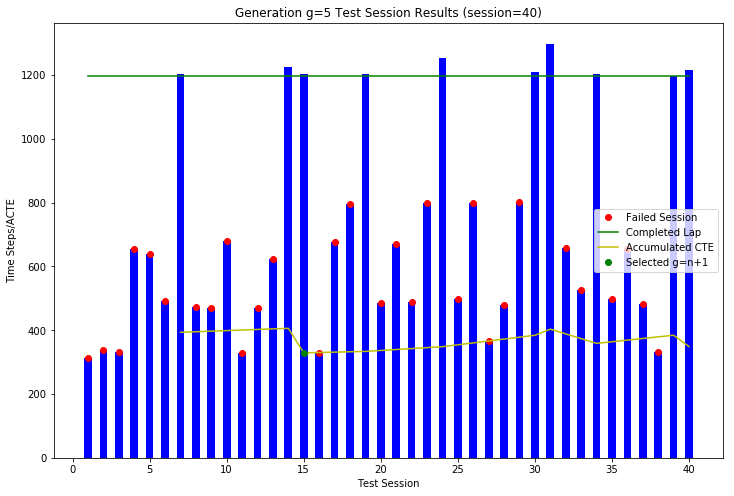

In [19]:
laptimestep = result_success['lap_timestep'].min()
minacte = result_success['acte'].min()
selected = result_success[result_success['acte'] == minacte]

N = test_end['session'].max()
ind = np.arange(N)  # the x locations for the groups
width = 0.5           # the width of the bars

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
p0 = ax1.bar(ind+1, test_end['lap_timestep'], width, color='b')
p1 = ax1.plot(result_failure['session'], result_failure['lap_timestep'], 'ro')
p2 = ax1.plot(test_end['session'], np.ones(test_end['session'].count())*laptimestep, 'g')
p3 = ax1.plot(result_success['session'], result_success['acte'], 'y')
p4 = ax1.plot(selected['session'], selected['acte'], 'go')
ax1.set_xlabel("Test Session", fontsize=10)
ax1.set_ylabel("Time Steps/ACTE", fontsize=10)
plt.title('Generation {} Test Session Results (session=40)'.format(generation))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Failed Session', 'Completed Lap', 'Accumulated CTE', 'Selected g=n+1'))
plt.show()

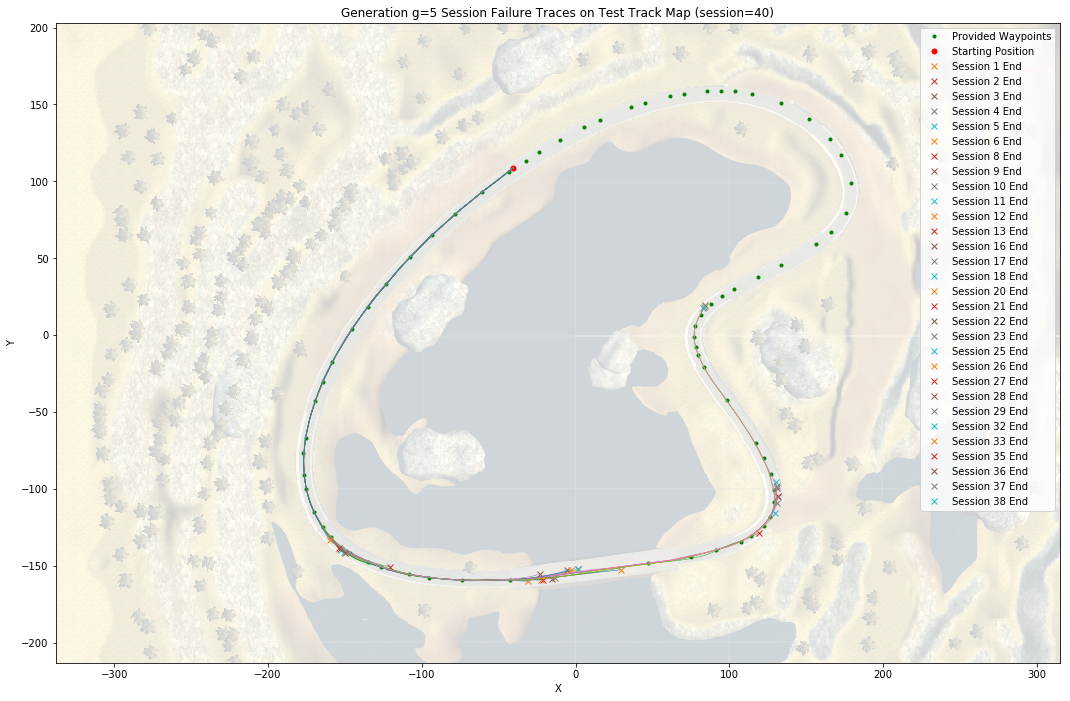

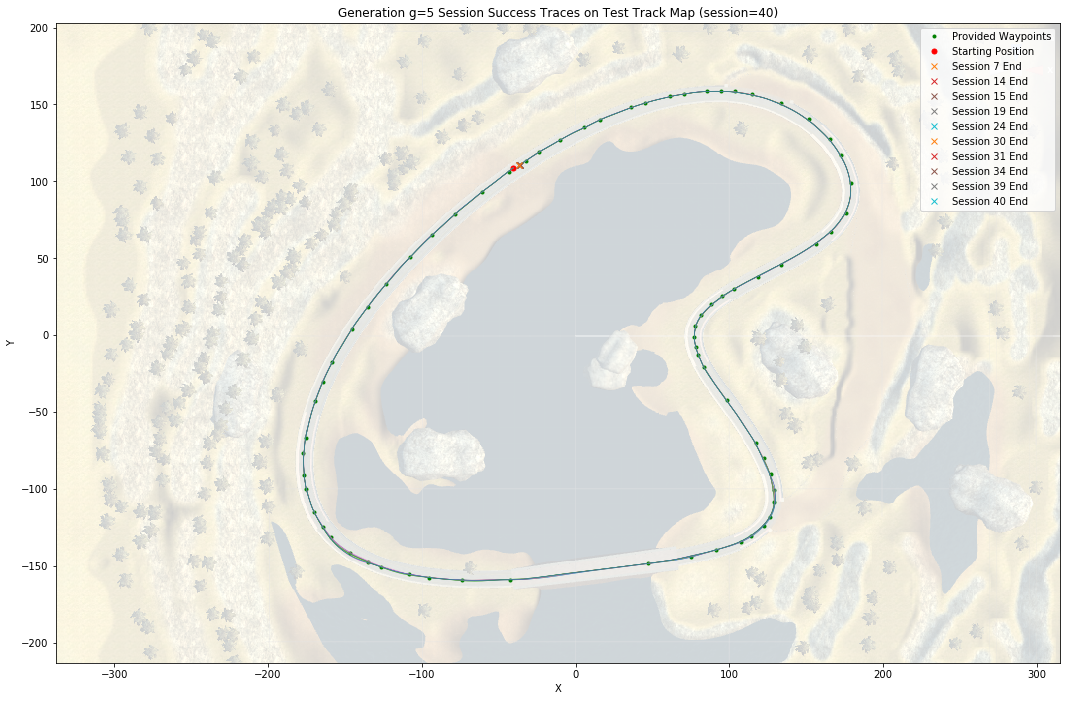

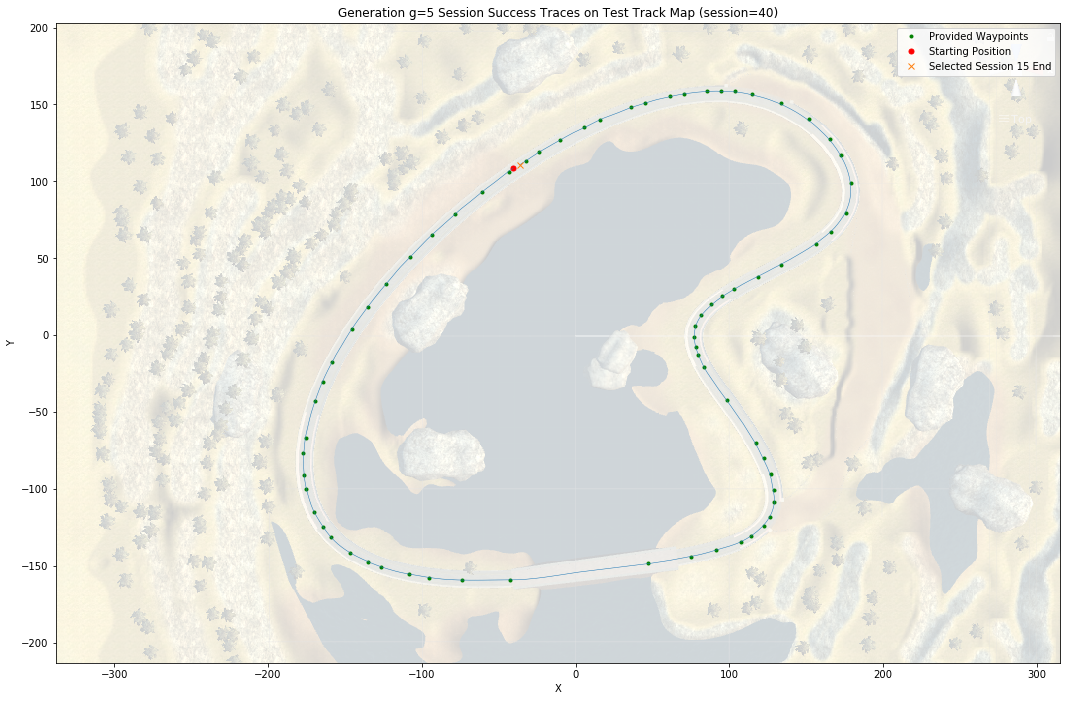

In [20]:
p0 = plt.imshow(img, extent=(-338, 315, -213, 203), alpha=0.2)
p1 = plt.plot(x_waypoint, y_waypoint, 'go', ms=3.0)
p2 = plt.plot(x_start, y_start, 'ro', ms=5.0)
testing_sessions = []
testing_sessions_end = []
sessions = [p1[0], p2[0]]
labels = ['Provided Waypoints', 'Starting Position']
plt.title('Generation {} Session Failure Traces on Test Track Map (session=40)'.format(generation))
plt.xlabel('X')
plt.ylabel('Y')
i = 0
for j in result_failure['session']:
    testing_sessions.append(testing_data[testing_data['session'] == j])
    testing_sessions_end.append(result_failure[result_failure['session'] == j])
    plt.plot(testing_sessions[i]['x'], testing_sessions[i]['y'], alpha=1.0, lw=0.5, zorder=40-i)
    sessions.append(plt.plot(testing_sessions_end[i]['x'], testing_sessions_end[i]['y'], 'x', alpha=1.0, lw=0.5, zorder=40-i)[0])
    labels.append('Session {} End'.format(j))
    i += 1
plt.legend(sessions, labels)
plt.show()

p0 = plt.imshow(img, extent=(-338, 315, -213, 203), alpha=0.2)
p1 = plt.plot(x_waypoint, y_waypoint, 'go', ms=3.0)
p2 = plt.plot(x_start, y_start, 'ro', ms=5.0)
testing_sessions = []
testing_sessions_end = []
sessions = [p1[0], p2[0]]
labels = ['Provided Waypoints', 'Starting Position']
plt.title('Generation {} Session Success Traces on Test Track Map (session=40)'.format(generation))
plt.xlabel('X')
plt.ylabel('Y')
i = 0
for j in result_success['session']:
    testing_sessions.append(testing_data[testing_data['session'] == j])
    testing_sessions_end.append(result_success[result_success['session'] == j])
    plt.plot(testing_sessions[i]['x'], testing_sessions[i]['y'], alpha=1.0, lw=0.5, zorder=40-i)
    sessions.append(plt.plot(testing_sessions_end[i]['x'], testing_sessions_end[i]['y'], 'x', alpha=1.0, lw=0.5, zorder=40-i)[0])
    labels.append('Session {} End'.format(j))
    i += 1
plt.legend(sessions, labels)
plt.show()

p0 = plt.imshow(img, extent=(-338, 315, -213, 203), alpha=0.2)
p1 = plt.plot(x_waypoint, y_waypoint, 'go', ms=3.0)
p2 = plt.plot(x_start, y_start, 'ro', ms=5.0)
testing_sessions = []
testing_sessions_end = []
sessions = [p1[0], p2[0]]
labels = ['Provided Waypoints', 'Starting Position']
plt.title('Generation {} Session Success Traces on Test Track Map (session=40)'.format(generation))
plt.xlabel('X')
plt.ylabel('Y')
i = 0
for j in selected['session']:
    testing_sessions.append(testing_data[testing_data['session'] == j])
    testing_sessions_end.append(result_success[result_success['session'] == j])
    plt.plot(testing_sessions[i]['x'], testing_sessions[i]['y'], alpha=1.0, lw=0.5, zorder=40-i)
    sessions.append(plt.plot(testing_sessions_end[i]['x'], testing_sessions_end[i]['y'], 'x', alpha=1.0, lw=0.5, zorder=40-i)[0])
    labels.append('Selected Session {} End'.format(j))
    i += 1
plt.legend(sessions, labels)
plt.show()

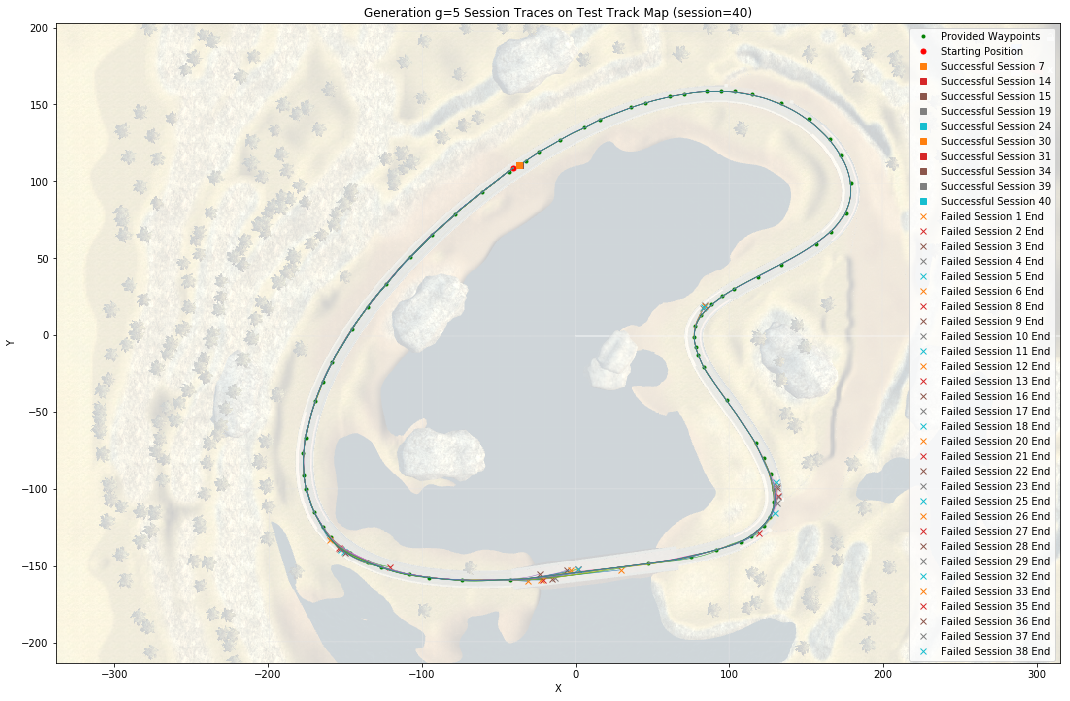

In [28]:
p0 = plt.imshow(img, extent=(-338, 315, -213, 203), alpha=0.2)
p1 = plt.plot(x_waypoint, y_waypoint, 'go', ms=3.0)
p2 = plt.plot(x_start, y_start, 'ro', ms=5.0)
testing_sessions = []
testing_sessions_end = []
sessions = [p1[0], p2[0]]
labels = ['Provided Waypoints', 'Starting Position']
plt.title('Generation {} Session Traces on Test Track Map (session=40)'.format(generation))
plt.xlabel('X')
plt.ylabel('Y')
i = 0
for j in result_success['session']:
    testing_sessions.append(testing_data[testing_data['session'] == j])
    testing_sessions_end.append(result_success[result_success['session'] == j])
    plt.plot(testing_sessions[i]['x'], testing_sessions[i]['y'], alpha=1.0, lw=0.5, zorder=40-i)
    sessions.append(plt.plot(testing_sessions_end[i]['x'], testing_sessions_end[i]['y'], 's', alpha=1.0, lw=0.5, zorder=40-i)[0])
    labels.append('Successful Session {}'.format(j))
    i += 1
for j in result_failure['session']:
    testing_sessions.append(testing_data[testing_data['session'] == j])
    testing_sessions_end.append(result_failure[result_failure['session'] == j])
    plt.plot(testing_sessions[i]['x'], testing_sessions[i]['y'], alpha=1.0, lw=0.5, zorder=40-i)
    sessions.append(plt.plot(testing_sessions_end[i]['x'], testing_sessions_end[i]['y'], 'x', alpha=1.0, lw=0.5, zorder=40-i)[0])
    labels.append('Failed Session {} End'.format(j))
    i += 1
plt.legend(sessions, labels)
plt.show()

